# Chest_XRay_Analysis (Pneumonia)
## Importing the dataset, important libraries and analysis of the images

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/chest-xray-pneumonia.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
from zipfile import ZipFile
file_name = "/content/chest_xray.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Visualaizing random Image samples


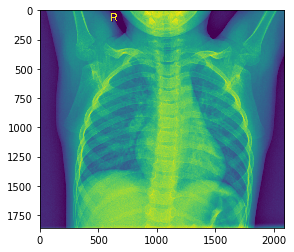

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(im)
plt.show()

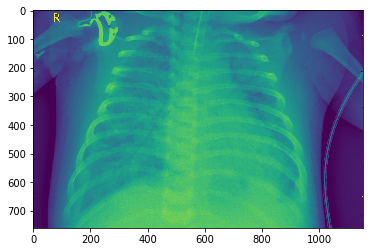

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
plt.imshow(im)
plt.show()

In [0]:
import os
import pandas as pd
filenames = os.listdir("/content/chest_xray/train/NORMAL")
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'IM':
        categories.append(1)
    else:
        categories.append(0)

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
import os
import pandas as pd
filenames = os.listdir("/content/chest_xray/train/PNEUMONIA")
categories = []
for filename in filenames:
    category = filename.split('1')[0]
    if category == 'person':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

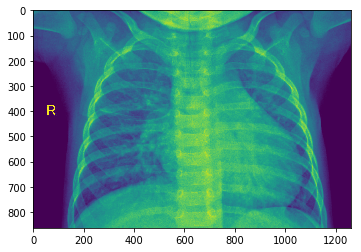

In [0]:

import random
sam = random.choice(filenames)
abc = filename.split('-')[0]
if abc == 'IM':
	image = plt.imread('/content/chest_xray/train/NORMAL'+sam)
else:
	image = plt.imread('/content/chest_xray/train/PNEUMONIA/'+sam)
plt.imshow(image)

## PLOTTING MULTIPLE IMAGE IN SAME WINDOW/FRAME

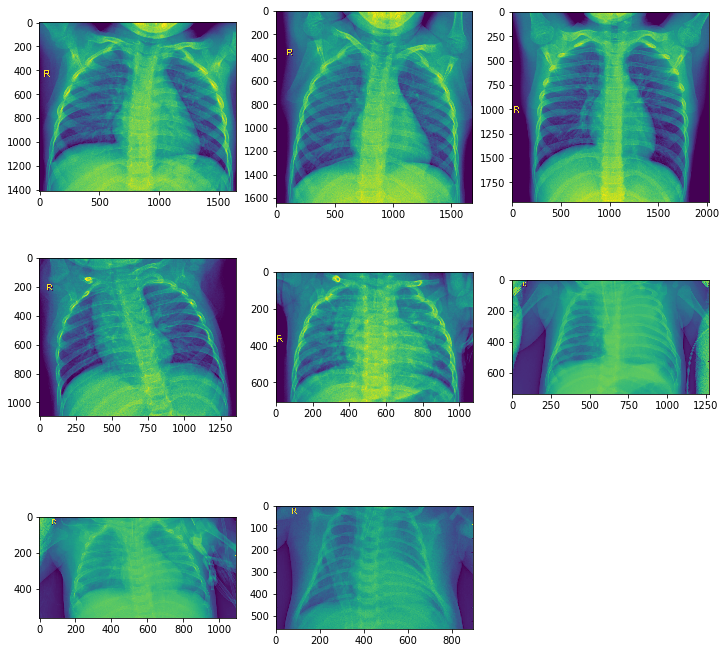

In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #The image module supports basic image loading, rescaling and display operations.

train_cat_fnames = os.listdir("/content/chest_xray/train/NORMAL")
train_dog_fnames = os.listdir("/content/chest_xray/train/PNEUMONIA")
nrows = 3
ncols = 3
pic_index = 0
pic_index += 4
next_cat_pix = [os.path.join("/content/chest_xray/train/NORMAL", fname)
               for fname in train_cat_fnames[pic_index-4:pic_index]]
next_dog_pix = [os.path.join("/content/chest_xray/train/PNEUMONIA", fname)
               for fname in train_dog_fnames[pic_index-4:pic_index]]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## CREATING A CNN MODEL

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()


W0715 09:35:22.172266 139882174179200 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

## DATA AUGMENTATION

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "/content/chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "/content/chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "/content/chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## CHECKING ACCURACY AFTER JUST AUGMENTATION

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

W0715 09:35:40.305691 139882174179200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/10
500/500 - 91s - loss: 0.5651 - acc: 0.7408 - val_loss: 0.5986 - val_acc: 0.6484
Epoch 2/10
500/500 - 87s - loss: 0.4001 - acc: 0.8078 - val_loss: 0.5679 - val_acc: 0.7452
Epoch 3/10
500/500 - 88s - loss: 0.3210 - acc: 0.8503 - val_loss: 0.4787 - val_acc: 0.7484
Epoch 4/10
500/500 - 88s - loss: 0.2781 - acc: 0.8755 - val_loss: 0.6037 - val_acc: 0.7790
Epoch 5/10
500/500 - 88s - loss: 0.2733 - acc: 0.8809 - val_loss: 0.3230 - val_acc: 0.8742
Epoch 6/10
500/500 - 88s - loss: 0.2498 - acc: 0.8939 - val_loss: 0.3430 - val_acc: 0.8435
Epoch 7/10
500/500 - 89s - loss: 0.2298 - acc: 0.9077 - val_loss: 0.2946 - val_acc: 0.8742
Epoch 8/10
500/500 - 87s - loss: 0.2235 - acc: 0.9081 - val_loss: 0.5147 - val_acc: 0.7968
Epoch 9/10
500/500 - 88s - loss: 0.2143 - acc: 0.9089 - val_loss: 0.3186 - val_acc: 0.8710
Epoch 10/10
500/500 - 87s - loss: 0.2094 - acc: 0.9163 - val_loss: 0.4085 - val_acc: 0.8129


## PLOTTING GRAPH ON INFERENCE

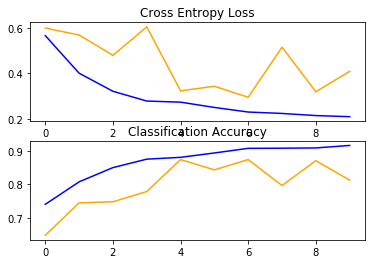

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

# TRANSFER LEARNING
## InceptionV3 Model

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-07-12 12:16:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  90.6MB/s    in 0.9s    

2019-07-12 12:16:59 (90.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# add a global spatial average pooling layer
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
# this is the model we made and trained
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

In [0]:
# this is the model we will train
model = Model(inputs=pre_trained_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.01),
             metrics=['acc'])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_609 (Conv2D)             (None, 74, 74, 32)   864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_594 (BatchN (None, 74, 74, 32)   96          conv2d_609[0][0]                 
__________________________________________________________________________________________________
activation_594 (Activation)     (None, 74, 74, 32)   0           batch_normalization_594[0][0]    
___________________________________________________________________________________________

In [0]:
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=5,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/5
500/500 - 107s - loss: 1.6015 - acc: 0.7480 - val_loss: 1.0229 - val_acc: 0.6694
Epoch 2/5
500/500 - 87s - loss: 0.5307 - acc: 0.8098 - val_loss: 1.7749 - val_acc: 0.5903
Epoch 3/5
500/500 - 88s - loss: 0.4652 - acc: 0.8341 - val_loss: 1.2692 - val_acc: 0.7194
Epoch 4/5
500/500 - 91s - loss: 0.4943 - acc: 0.8289 - val_loss: 1.4162 - val_acc: 0.6242
Epoch 5/5
500/500 - 89s - loss: 0.4772 - acc: 0.8295 - val_loss: 6.5117 - val_acc: 0.6484


## Fine Tuning Model

In [0]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
last_layer = pre_trained_model.get_layer('mixed5')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['acc'])
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=2)

Epoch 1/15
500/500 - 106s - loss: 0.3463 - acc: 0.8833 - val_loss: 3.9676 - val_acc: 0.6242
Epoch 2/15
500/500 - 84s - loss: 0.2444 - acc: 0.9155 - val_loss: 1.9214 - val_acc: 0.6677
Epoch 3/15
500/500 - 83s - loss: 0.2396 - acc: 0.9281 - val_loss: 2.3293 - val_acc: 0.6484
Epoch 4/15
500/500 - 83s - loss: 0.2162 - acc: 0.9355 - val_loss: 2.1790 - val_acc: 0.6565
Epoch 5/15
500/500 - 83s - loss: 0.1832 - acc: 0.9406 - val_loss: 1.0284 - val_acc: 0.7903
Epoch 6/15
500/500 - 83s - loss: 0.2036 - acc: 0.9380 - val_loss: 2.9574 - val_acc: 0.6581
Epoch 7/15
500/500 - 83s - loss: 0.1938 - acc: 0.9420 - val_loss: 2.6353 - val_acc: 0.6419
Epoch 8/15
500/500 - 83s - loss: 0.1696 - acc: 0.9462 - val_loss: 2.4792 - val_acc: 0.6855
Epoch 9/15
500/500 - 84s - loss: 0.1744 - acc: 0.9482 - val_loss: 0.9161 - val_acc: 0.8274
Epoch 10/15
500/500 - 84s - loss: 0.1836 - acc: 0.9452 - val_loss: 2.2260 - val_acc: 0.6726
Epoch 11/15
500/500 - 85s - loss: 0.1670 - acc: 0.9472 - val_loss: 2.1251 - val_acc: 0.6

## InceptionResNetV2 Model


In [0]:
import tensorflow
model1 = tensorflow.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, 
                                                         weights='imagenet', 
                                                         input_shape=(150,150,3))

In [0]:
model1.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_403 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_391 (BatchN (None, 74, 74, 32)   96          conv2d_403[0][0]                 
__________________________________________________________________________________________________
activation_391 (Activation)     (None, 74, 74, 32)   0           batch_normalization_391[0][0]    
________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
# add a global spatial average pooling layer
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = model1.get_layer("mixed_7a")
output = last_layer.output


x = GlobalAveragePooling2D()(output)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model1.input, outputs=predictions)

TypeError: ignored

In [0]:
from tensorflow.keras.optimizers import SGD
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=0.001, momentum=0.9, decay=0.01, nesterov=True),
             metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=62,
      verbose=2)

## VGG16 Model

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

trained1_model = VGG16(include_top=False, 
                      weights="imagenet", 
                      input_shape=(150,150,3))

In [0]:
trained1_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from tensorflow.keras import Model,layers

    
last_layer = trained1_model.get_layer("block5_conv3")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(1, activation='sigmoid')(x)

model = Model(trained1_model.input, y)


In [0]:
flag = False

for layer in trained1_model.layers:
  if flag:
    layer.trainable = True
  if layer.name == 'block4_conv3':
    flag = True

In [0]:
from tensorflow.keras.optimizers import SGD


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.0001, 
                  momentum=0.9),
              metrics=['acc'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/20
100/100 - 23s - loss: 0.3974 - acc: 0.8120 - val_loss: 0.3622 - val_acc: 0.8520
Epoch 2/20
100/100 - 21s - loss: 0.2792 - acc: 0.8715 - val_loss: 0.2749 - val_acc: 0.8960
Epoch 3/20
100/100 - 21s - loss: 0.2112 - acc: 0.9210 - val_loss: 0.2980 - val_acc: 0.8800
Epoch 4/20
100/100 - 21s - loss: 0.2241 - acc: 0.9020 - val_loss: 0.2713 - val_acc: 0.9000
Epoch 5/20
100/100 - 21s - loss: 0.1981 - acc: 0.9140 - val_loss: 0.3173 - val_acc: 0.8760
Epoch 6/20
100/100 - 21s - loss: 0.1849 - acc: 0.9217 - val_loss: 0.2592 - val_acc: 0.9000
Epoch 7/20
100/100 - 20s - loss: 0.2082 - acc: 0.9200 - val_loss: 0.2815 - val_acc: 0.8960
Epoch 8/20
100/100 - 20s - loss: 0.2020 - acc: 0.9150 - val_loss: 0.2831 - val_acc: 0.8960
Epoch 9/20
100/100 - 20s - loss: 0.2015 - acc: 0.9140 - val_loss: 0.2377 - val_acc: 0.9120
Epoch 10/20
100/100 - 21s - loss: 0.1913 - acc: 0.9220 - val_loss: 0.2439 - val_acc: 0.9000
Epoch 11/20
100/100 - 20s - loss: 0.1845 - acc: 0.9267 - val_loss: 0.3271 - val_acc: 0.89

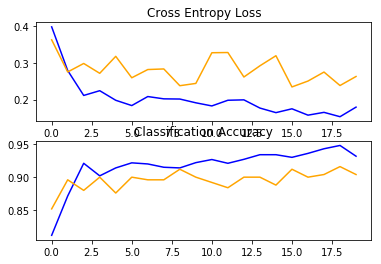

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/20
100/100 - 23s - loss: 0.1852 - acc: 0.9347 - val_loss: 0.2272 - val_acc: 0.9080
Epoch 2/20
100/100 - 22s - loss: 0.1594 - acc: 0.9380 - val_loss: 0.2238 - val_acc: 0.9280
Epoch 3/20
100/100 - 21s - loss: 0.1544 - acc: 0.9400 - val_loss: 0.2255 - val_acc: 0.9280
Epoch 4/20
100/100 - 21s - loss: 0.1685 - acc: 0.9330 - val_loss: 0.2222 - val_acc: 0.9200
Epoch 5/20
100/100 - 21s - loss: 0.1581 - acc: 0.9430 - val_loss: 0.2287 - val_acc: 0.9240
Epoch 6/20
100/100 - 21s - loss: 0.1539 - acc: 0.9440 - val_loss: 0.2222 - val_acc: 0.9200
Epoch 7/20
100/100 - 20s - loss: 0.1584 - acc: 0.9400 - val_loss: 0.2440 - val_acc: 0.9200
Epoch 8/20
100/100 - 21s - loss: 0.1587 - acc: 0.9418 - val_loss: 0.2233 - val_acc: 0.9000
Epoch 9/20
100/100 - 21s - loss: 0.1696 - acc: 0.9390 - val_loss: 0.2926 - val_acc: 0.8920
Epoch 10/20
100/100 - 21s - loss: 0.1360 - acc: 0.9440 - val_loss: 0.2208 - val_acc: 0.9240
Epoch 11/20
100/100 - 21s - loss: 0.1579 - acc: 0.9420 - val_loss: 0.2173 - val_acc: 0.91

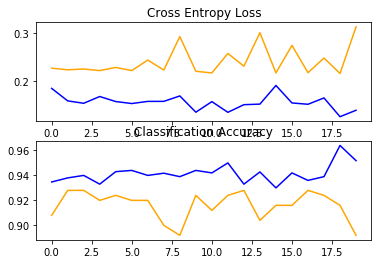

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(X.history['loss'], color='blue', label='train')
pyplot.plot(X.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(X.history['acc'], color='blue', label='train')
pyplot.plot(X.history['val_acc'], color='orange', label='test')
pyplot.show()